# Unsupervised Learning Project

## Alok Sawant 

## Importing the Libraries 

In [1]:
import pandas as pd 
import numpy as np
from sklearn import svm 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from scipy.stats import zscore

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import roc_curve, auc

### Function to calculate accuracy 

In [2]:
def getAccuracy(testSet, predictions):
        correct = 0
        for x in range(len(testSet)):
            if testSet[x] == predictions[x]:
                correct += 1
        return (correct/float(len(testSet)))*100.0

## Part-1
### Automobile 

## Importing the data (Task-1) 

Import part1 of dataset

In [3]:


p1data = pd.read_csv("Part1 - Car name.csv")
p1data.shape

(398, 1)

The given data set contains 398 rows and 1 columns 

Import part 2 of data set

In [4]:
p2data = pd.read_json('Part1 - Car-Attributes.json')
p2data.shape

(398, 8)

The given data set contains 398 rows and 8 columns 
Merge

In [5]:
merge = pd.concat([p1data, p2data],axis=1, join="inner")

In [6]:
merge.shape

(398, 9)

In [7]:
merge.to_csv('/Users/Alok/Desktop/AIML/Course/unsupervised_learning/merge.csv', index=False)

In [8]:
data1 = pd.read_csv('merge.csv')

In [9]:
data1.head(10)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
5           ford galaxie 500  15.0    8  429.0  198  4341  10.0  70       1
6           chevrolet impala  14.0    8  454.0  220  4354   9.0  70       1
7          plymouth fury iii  14.0    8  440.0  215  4312   8.5  70       1
8           pontiac catalina  14.0    8  455.0  225  4425  10.0  70       1
9         amc ambassador dpl  15.0    8  390.0  190  3850   8.5  70       1

## Data Cleansing (Task -2)

In [10]:
#dropping/ignoring car_name  and origin (since origin is categorical data)
cData = data1.drop(['car_name','origin'], axis=1)
cData.head()

mpg  cyl   disp   hp    wt   acc  yr
0  18.0    8  307.0  130  3504  12.0  70
1  15.0    8  350.0  165  3693  11.5  70
2  18.0    8  318.0  150  3436  11.0  70
3  16.0    8  304.0  150  3433  12.0  70
4  17.0    8  302.0  140  3449  10.5  70

In [11]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In the given dataset hp columns is object may be because it is having non-numerical values

In [12]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(cData.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
cData[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false


mpg  cyl   disp hp    wt   acc  yr
32   25.0    4   98.0  ?  2046  19.0  71
126  21.0    6  200.0  ?  2875  17.0  74
330  40.9    4   85.0  ?  1835  17.3  80
336  23.6    4  140.0  ?  2905  14.3  80
354  34.5    4  100.0  ?  2320  15.8  81
374  23.0    4  151.0  ?  3035  20.5  82

In [13]:
cData = cData.replace('?', np.nan)
cData[hpIsDigit['hp'] == False] 

mpg  cyl   disp   hp    wt   acc  yr
32   25.0    4   98.0  NaN  2046  19.0  71
126  21.0    6  200.0  NaN  2875  17.0  74
330  40.9    4   85.0  NaN  1835  17.3  80
336  23.6    4  140.0  NaN  2905  14.3  80
354  34.5    4  100.0  NaN  2320  15.8  81
374  23.0    4  151.0  NaN  3035  20.5  82

In [14]:
# replace the missing values with median value.
medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller,axis=0)

cData['hp'] = cData['hp'].astype('float64')  # converting the hp column from object / string type to float

In [15]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


## Data analysis and visualisation (Task - 3)

### 1) MPG vs origin  

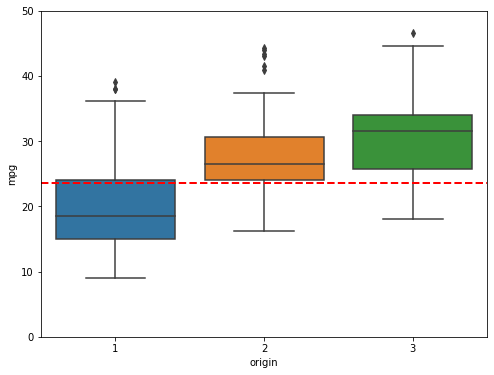

In [16]:
var = 'origin'
data_plt = pd.concat([data1['mpg'], data1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=50)
plt.axhline(data1.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In the plot above, the red line shows the global average of mpg. 
The majority of cars belonging to origin 1 has average mpg below global average mpg 
The majority of cars belonging to origin 2 and 3 has average mpg above global average mpg 

### 2) MPG vs cylinder

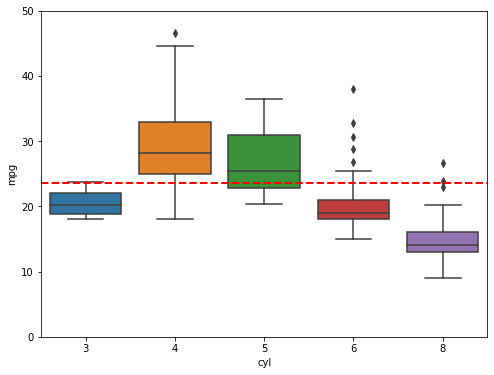

In [17]:
var = 'cyl'
data_plt = pd.concat([data1['mpg'], data1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=50)
plt.axhline(data1.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The above plot shows that majority of the cars having 4 or 5 cylender have above global average mpg. 

### 3) MPG vs year

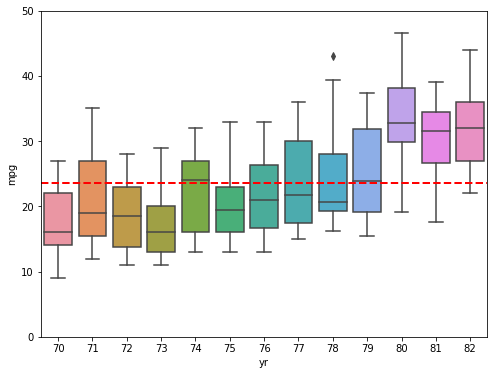

In [18]:
var = 'yr'
data_plt = pd.concat([data1['mpg'], data1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=50)
plt.axhline(data1.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The plot shows that the majority of the cars befor year 79 has average mpg below global average mpg, except for year 74 (where average mpg is slightly above global average mpg)

### 4) MPG vs Company names

In the given dataset the car_name attribute contains Company_name - Model name - variant. These can be seperated for further analysis 

In [19]:
data1.car_name.unique

<bound method Series.unique of 0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car_name, Length: 398, dtype: object>

In [20]:
data1.index =data1.car_name
data1.index


Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car_name', length=398)

In [21]:
data1[data1.car_name.str.contains('subaru')].car_name.str.replace('(.*)', 'subaru dl')
data1['Company_Name'] = data1.car_name.str.extract('(^.*?)\s')
data1['Company_Name'] = data1['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data1['Company_Name'] = data1['Company_Name'].replace('maxda','mazda')
data1['Company_Name'] = data1['Company_Name'].replace('toyouta','toyota')
data1['Company_Name'] = data1['Company_Name'].replace('mercedes','mercedes-benz')
data1['Company_Name'] = data1['Company_Name'].replace('nissan','datsun')
data1['Company_Name'] = data1['Company_Name'].replace('capri','ford')
data1['Company_Name'] = data1['Company_Name'].replace(['chevroelt','chevy'],'chevrolet') 

In [22]:
data1.head()

car_name   mpg  cyl   disp   hp  \
car_name                                                                      
chevrolet chevelle malibu  chevrolet chevelle malibu  18.0    8  307.0  130   
buick skylark 320                  buick skylark 320  15.0    8  350.0  165   
plymouth satellite                plymouth satellite  18.0    8  318.0  150   
amc rebel sst                          amc rebel sst  16.0    8  304.0  150   
ford torino                              ford torino  17.0    8  302.0  140   

                             wt   acc  yr  origin Company_Name  
car_name                                                        
chevrolet chevelle malibu  3504  12.0  70       1    chevrolet  
buick skylark 320          3693  11.5  70       1        buick  
plymouth satellite         3436  11.0  70       1     plymouth  
amc rebel sst              3433  12.0  70       1          amc  
ford torino                3449  10.5  70       1         ford

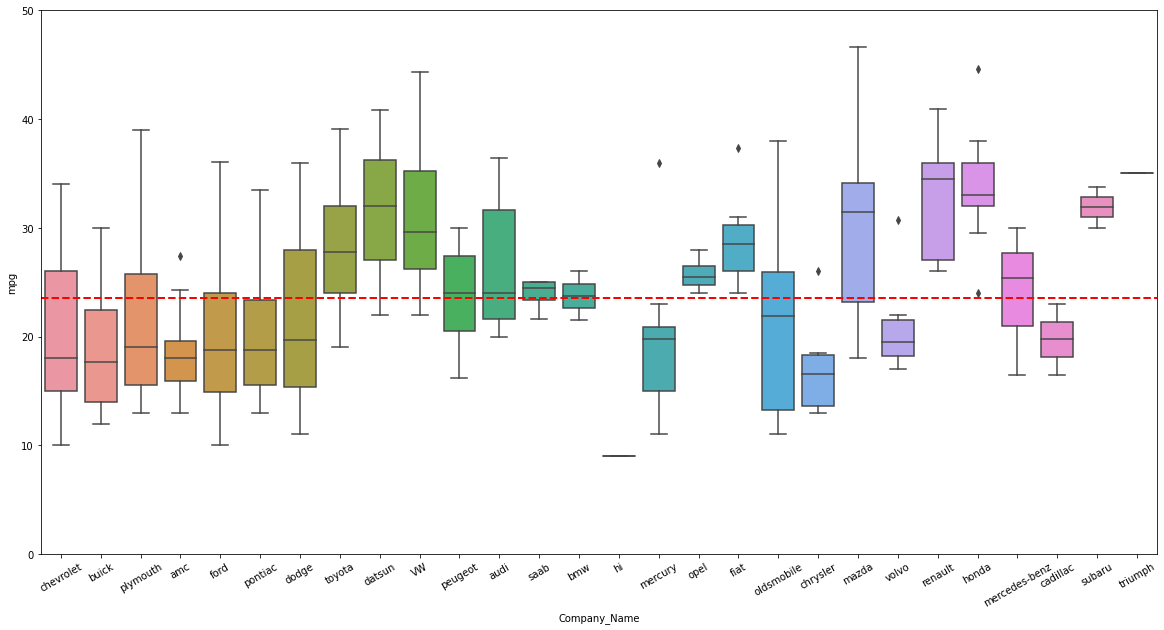

In [23]:
var = 'Company_Name'
data_plt = pd.concat([data1['mpg'], data1[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=50)
plt.axhline(data1.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The above plot shows mpg distribution for the various car manufacturer 

### Pair plot for the dataset

/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


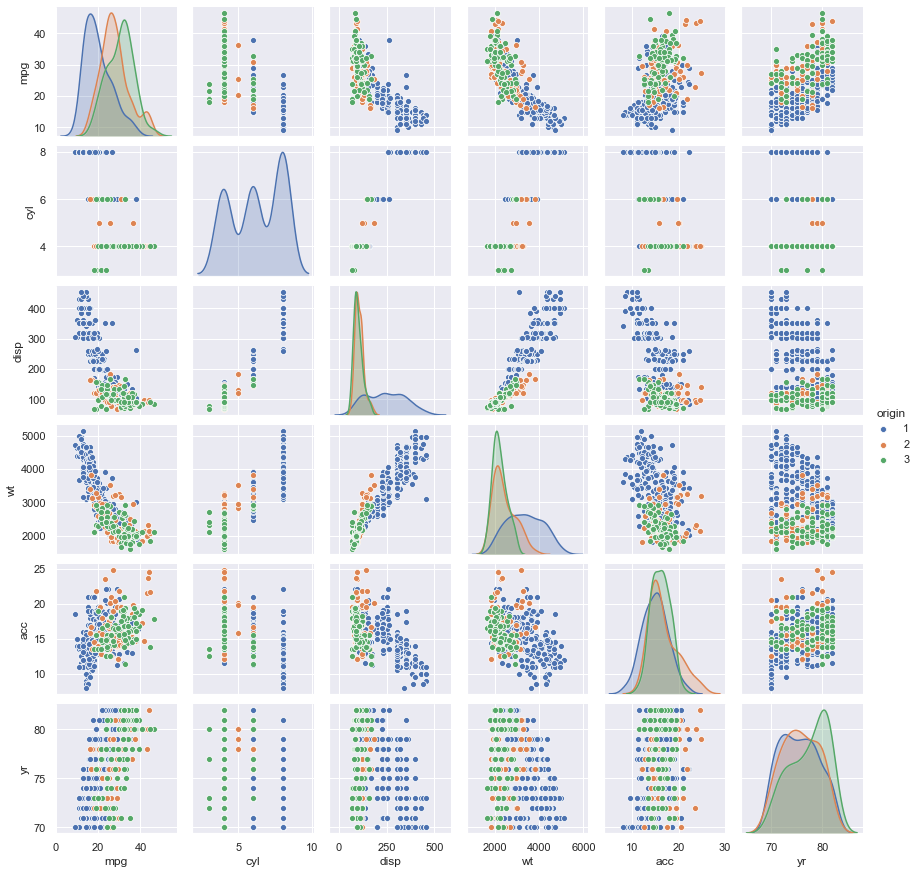

In [24]:
#scatterplot
sns.set()
sns.pairplot(data1, size = 2.0,hue ='origin')
plt.show()

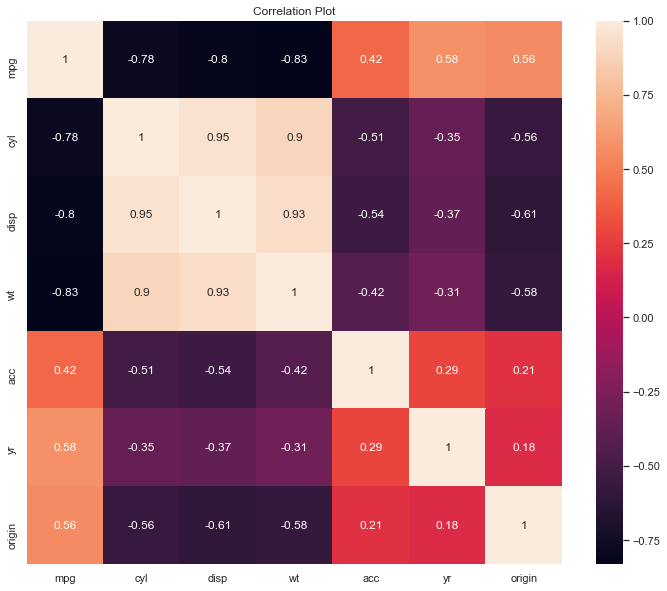

In [25]:
corr = data1.corr()

# Plotting corelations using heatmap

plt.figure(figsize=(12,10))
plt.title("Correlation Plot")
sns.heatmap(corr, annot=True)
plt.show()

## Machine learning (Task - 4)

### Scaling the data

In [26]:
# independant variables
X = cData.drop(['mpg'], axis=1)
# the dependent variable
y = cData[['mpg']]

from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

cyl      disp        hp        wt       acc        yr
0  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426
1  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426
2  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426
3  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426
4  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426

### K means clustering 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

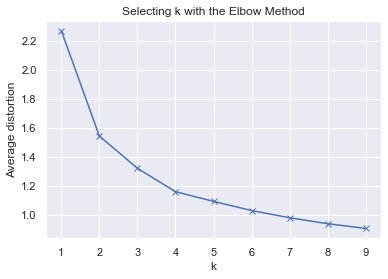

In [27]:
#Finding optimal no. of clusters using k mean method 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(XScaled)
    prediction=model.predict(XScaled)
    meanDistortions.append(sum(np.min(cdist(XScaled, model.cluster_centers_, 'euclidean'), axis=1)) / XScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


The location of a knee in the plot is usually considered as an indicator of the appropriate number of clusters because it means that adding another cluster does not improve much better the partition. 
The above plot shows clear knee in elbow at k=2. 

In [28]:
# Using K = 2
final_model=KMeans(2)
final_model.fit(XScaled)
prediction=final_model.predict(XScaled)

#Append the prediction 
cData["GROUP"] = prediction
XScaled["GROUP"] = prediction
print("Groups Assigned : \n")
cData.head()

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  GROUP
0  18.0    8  307.0  130.0  3504  12.0  70      1
1  15.0    8  350.0  165.0  3693  11.5  70      1
2  18.0    8  318.0  150.0  3436  11.0  70      1
3  16.0    8  304.0  150.0  3433  12.0  70      1
4  17.0    8  302.0  140.0  3449  10.5  70      1

In [29]:
cDataClust = cData.groupby(['GROUP'])
cDataClust.mean()

mpg       cyl        disp          hp          wt        acc  \
GROUP                                                                       
0      26.550340  4.568027  140.198980   85.112245  2569.47619  16.520408   
1      14.932692  7.961538  343.894231  158.557692  4103.87500  12.875962   

              yr  
GROUP             
0      76.768707  
1      73.865385

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecf0b50d30>,
      dtype=object)

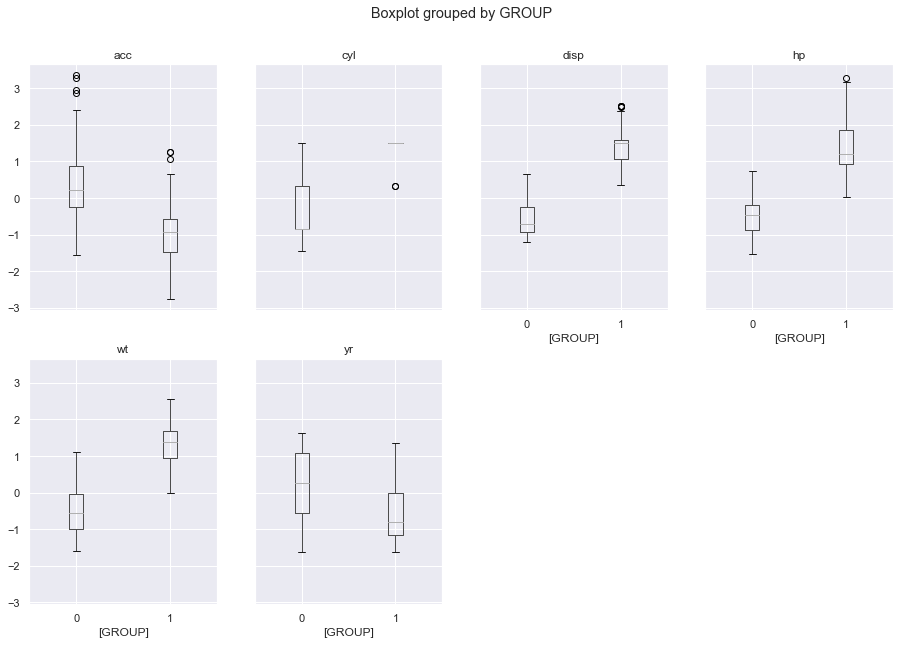

In [30]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Hierarchial clustering 

In [31]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(XScaled)

AgglomerativeClustering(linkage='average')

In [32]:
cData['labels'] = model.labels_
cData.head(10)

mpg  cyl   disp     hp    wt   acc  yr  GROUP  labels
0  18.0    8  307.0  130.0  3504  12.0  70      1       0
1  15.0    8  350.0  165.0  3693  11.5  70      1       0
2  18.0    8  318.0  150.0  3436  11.0  70      1       0
3  16.0    8  304.0  150.0  3433  12.0  70      1       0
4  17.0    8  302.0  140.0  3449  10.5  70      1       0
5  15.0    8  429.0  198.0  4341  10.0  70      1       0
6  14.0    8  454.0  220.0  4354   9.0  70      1       0
7  14.0    8  440.0  215.0  4312   8.5  70      1       0
8  14.0    8  455.0  225.0  4425  10.0  70      1       0
9  15.0    8  390.0  190.0  3850   8.5  70      1       0

In [33]:
cDataClust = cData.groupby(['labels'])
cDataClust.mean()

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       14.989423  7.980769  343.913462  158.365385  4108.278846  12.959615   
1       26.530272  4.561224  140.192177   85.180272  2567.918367  16.490816   

               yr     GROUP  
labels                       
0       73.942308  0.990385  
1       76.741497  0.003401

In [34]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(XScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(XScaled))

c

0.8244164715771007

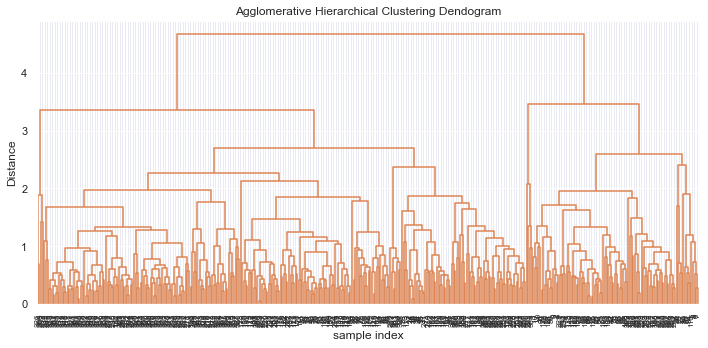

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In the given data set K means method showed two optimal clusters in the given data set. While, using Hierarchical clustering method the dendrogram above shows that the data can be divided in 2 optimal clusters. 

### Splitting data into training and testing set

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Linear regression model

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for cyl is -0.18095805032306134
The coefficient for disp is 0.010983679987754645
The coefficient for hp is -0.00898274748809656
The coefficient for wt is -0.007188190332770612
The coefficient for acc is 0.02914290133876269
The coefficient for yr is 0.7883566858707713


In [41]:
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -15.621707993406599


In [42]:
model.score(x_test, y_test)

0.826804750114966

In [46]:
cDataClust.head()

mpg  cyl   disp     hp    wt   acc  yr  GROUP  labels
0   18.0    8  307.0  130.0  3504  12.0  70      1       0
1   15.0    8  350.0  165.0  3693  11.5  70      1       0
2   18.0    8  318.0  150.0  3436  11.0  70      1       0
3   16.0    8  304.0  150.0  3433  12.0  70      1       0
4   17.0    8  302.0  140.0  3449  10.5  70      1       0
14  24.0    4  113.0   95.0  2372  15.0  70      0       1
15  22.0    6  198.0   95.0  2833  15.5  70      0       1
16  18.0    6  199.0   97.0  2774  15.5  70      0       1
17  21.0    6  200.0   85.0  2587  16.0  70      0       1
18  27.0    4   97.0   88.0  2130  14.5  70      0       1

In [47]:
# Splitting data accocding to the clustters
Cluster1=cData[cData['labels']==0]
Cluster2=cData[cData['labels']==1]

X_clust_1 = Cluster1.drop(['mpg', 'GROUP', 'labels'], axis=1)
X_clust_2 = Cluster2.drop(['mpg', 'GROUP', 'labels'], axis=1)

y_clust_1 = Cluster1['mpg']
y_clust_2 = Cluster2['mpg']

X_clust_1.shape

(104, 6)

### For cluster 1

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X_clust_1,y_clust_1,test_size=0.3,random_state=1)

In [49]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [50]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for cyl is -0.6135274395339237
The coefficient for disp is 0.010536398528304375
The coefficient for hp is -0.023955113948680638
The coefficient for wt is -0.002263255788444855
The coefficient for acc is 0.04064114664778857
The coefficient for yr is 0.3340768878533721


In [51]:
intercept = model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.094177952246664


In [52]:
model.score(x_test, y_test)

0.6777863870629293

### For Cluster 2

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X_clust_2,y_clust_2,test_size=0.3, random_state=1)

In [54]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [55]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for cyl is 0.7654363604403668
The coefficient for disp is -0.026471386560153
The coefficient for hp is -0.06769965902885003
The coefficient for wt is -0.006286827751146289
The coefficient for acc is 0.11158002038064824
The coefficient for yr is 0.8285091971032668


In [56]:
intercept = model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -16.74978168728932


In [57]:
model.score(x_test, y_test)

0.7116026405407475

When all of the dataset is used as single cluster, the linear regression model showed accuracy of 82%. When the data set is split into two cluster and the linear regression model showed accuracy of 67% for cluster 1 and 71% for cluster 2. The decrease in the accuracy is may be due to less dataset available for training and testing purpose while using two different clusters. To imporve the prediction accuracy further more data points are needed for linearregression model in each clusters. 

## Part-2

In [137]:
#Loading dataset
wine = pd.read_excel('Part2Company.xlsx')

In [138]:
wine.shape

(61, 5)

In [139]:
wine.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [140]:
wine.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

There are 18 missing values in the dataframe for Quality attribute

In [141]:
# independant variables
X = wine.drop(['Quality'], axis=1)
# the dependent variable
y = wine[['Quality']]

# Scaling the dataset

from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

A         B         C         D
0 -1.168034 -1.561080 -1.061569 -0.103138
1  0.904992  0.284923  0.306077  0.823013
2  0.660147  0.807376  0.321443  0.264129
3 -0.939512 -1.630740 -1.706975 -1.125099
4 -0.972158 -0.986381 -1.614775 -0.741864

In [142]:
# Appling K mean classifier 
# Using K = 2
final_model=KMeans(2)
final_model.fit(XScaled)
prediction=final_model.predict(XScaled)

#Append the prediction 
wine["GROUP"] = prediction
XScaled["GROUP"] = prediction
print("Groups Assigned : \n")
wine.head()

Groups Assigned : 



A    B    C    D    Quality  GROUP
0   47   27   45  108  Quality A      0
1  174  133  134  166  Quality B      1
2  159  163  135  131        NaN      1
3   61   23    3   44  Quality A      0
4   59   60    9   68  Quality A      0

### Imputing the missing value for the attribute 'Quality' 

In [300]:
wine.loc[wine['GROUP'] == 0, 'Quality'] = 'Quality A'
wine.loc[wine['GROUP'] == 1, 'Quality'] = 'Quality B'

In [301]:
wine.head()

A    B    C    D    Quality  GROUP
0   47   27   45  108  Quality A      0
1  174  133  134  166  Quality B      1
2  159  163  135  131  Quality B      1
3   61   23    3   44  Quality A      0
4   59   60    9   68  Quality A      0

## Part-3

In [302]:
df = pd.read_csv('Part3 - vehicle.csv')
df.shape

(846, 19)

The dataframe consists of 846 rows and 19 columns

In [303]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

Most of the data in the given dataframe is numberical except for the 'Class' attribute which shows category of the vehical

In [305]:
#### Cheacking for null values 
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [306]:
## Five point summary
df.describe().T 

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [307]:
## Replacing missing values with the median values in the dataFrame 
df = df.fillna(df.median()) 
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

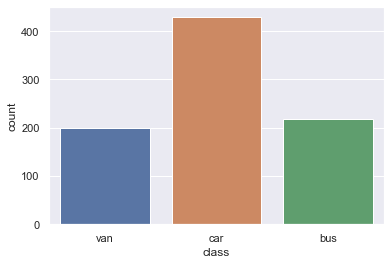

In [308]:
## Plotting distribution of the target class 
sns.countplot(df['class']);

Majority of the target class contains cars followed by bus and van. Almost 50% of the dataset contains cars  

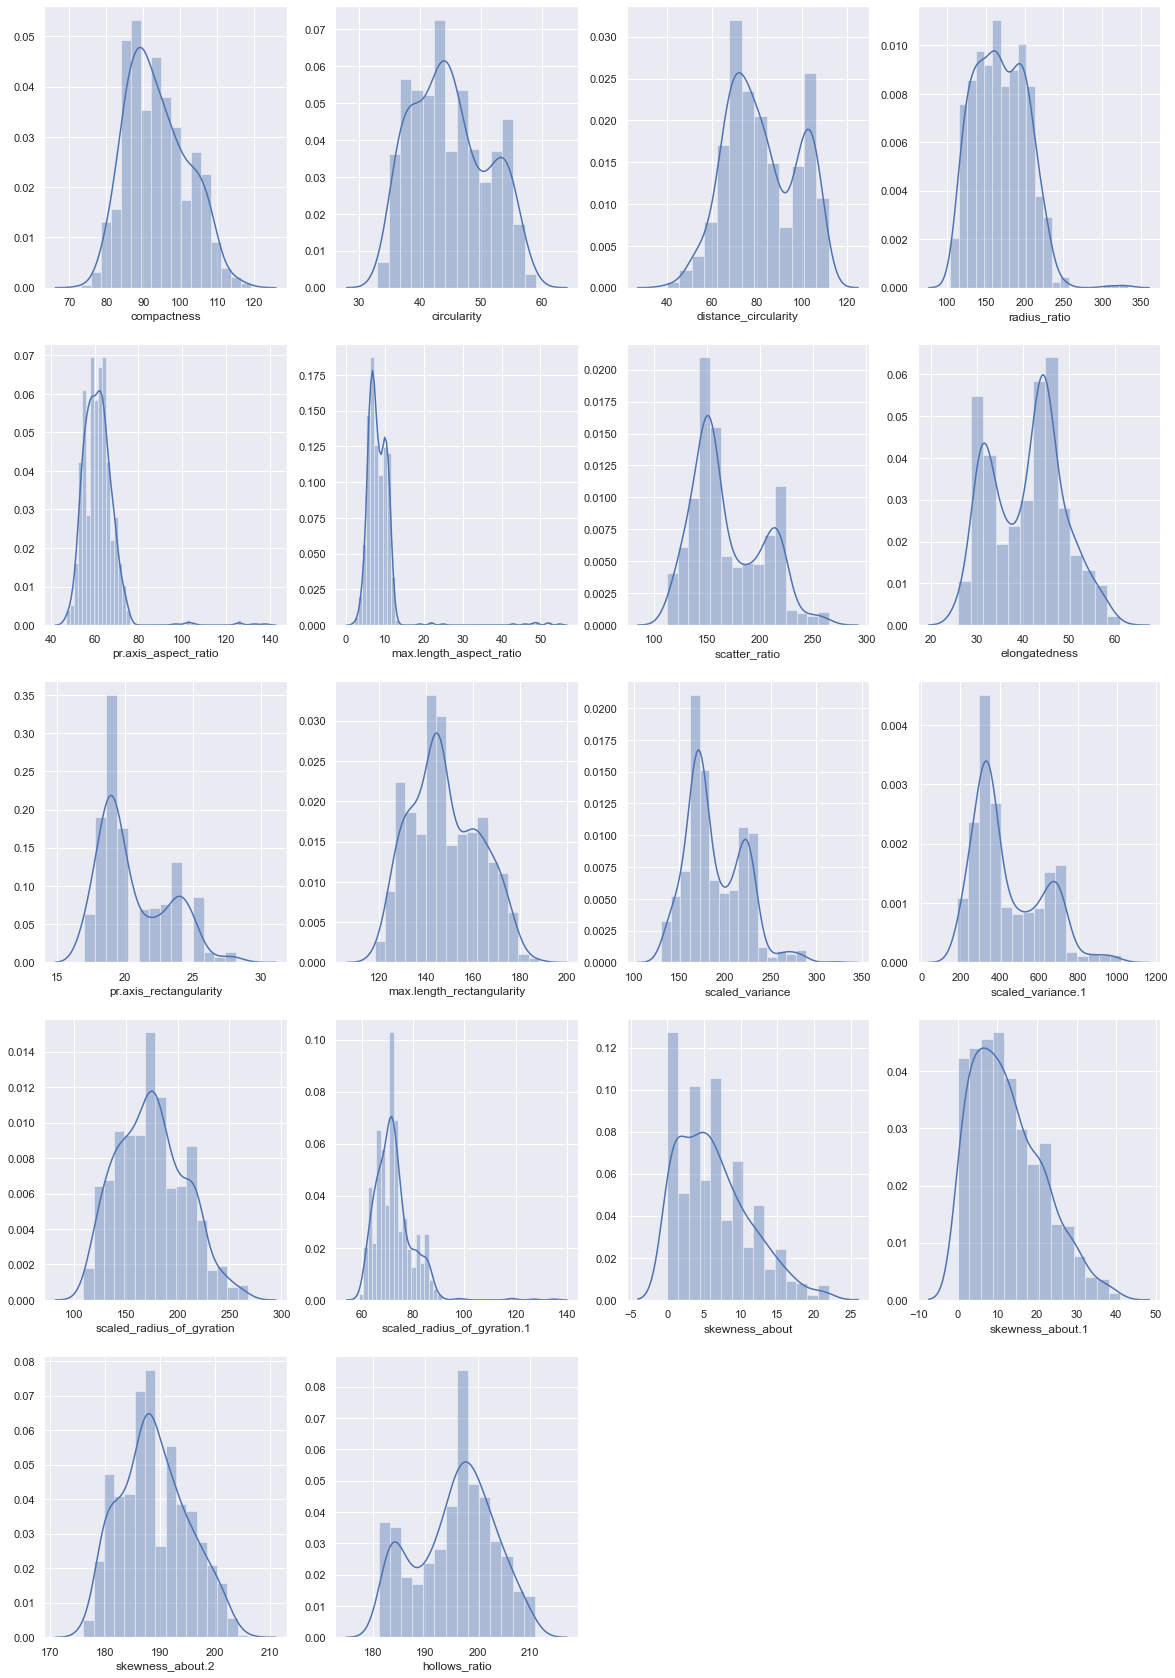

In [168]:
i=1
plt.figure(figsize=(20,30))
for k in df.columns[0:18] :
    plt.subplot(5,4, i)
    sns.distplot(df[k])
    i=i+1
plt.show()

1) In the given dataset 'compactness' and 'circularity' attirbute seems to be normally distributed.

2) Most of the attributes in the dataset are positively skewed.


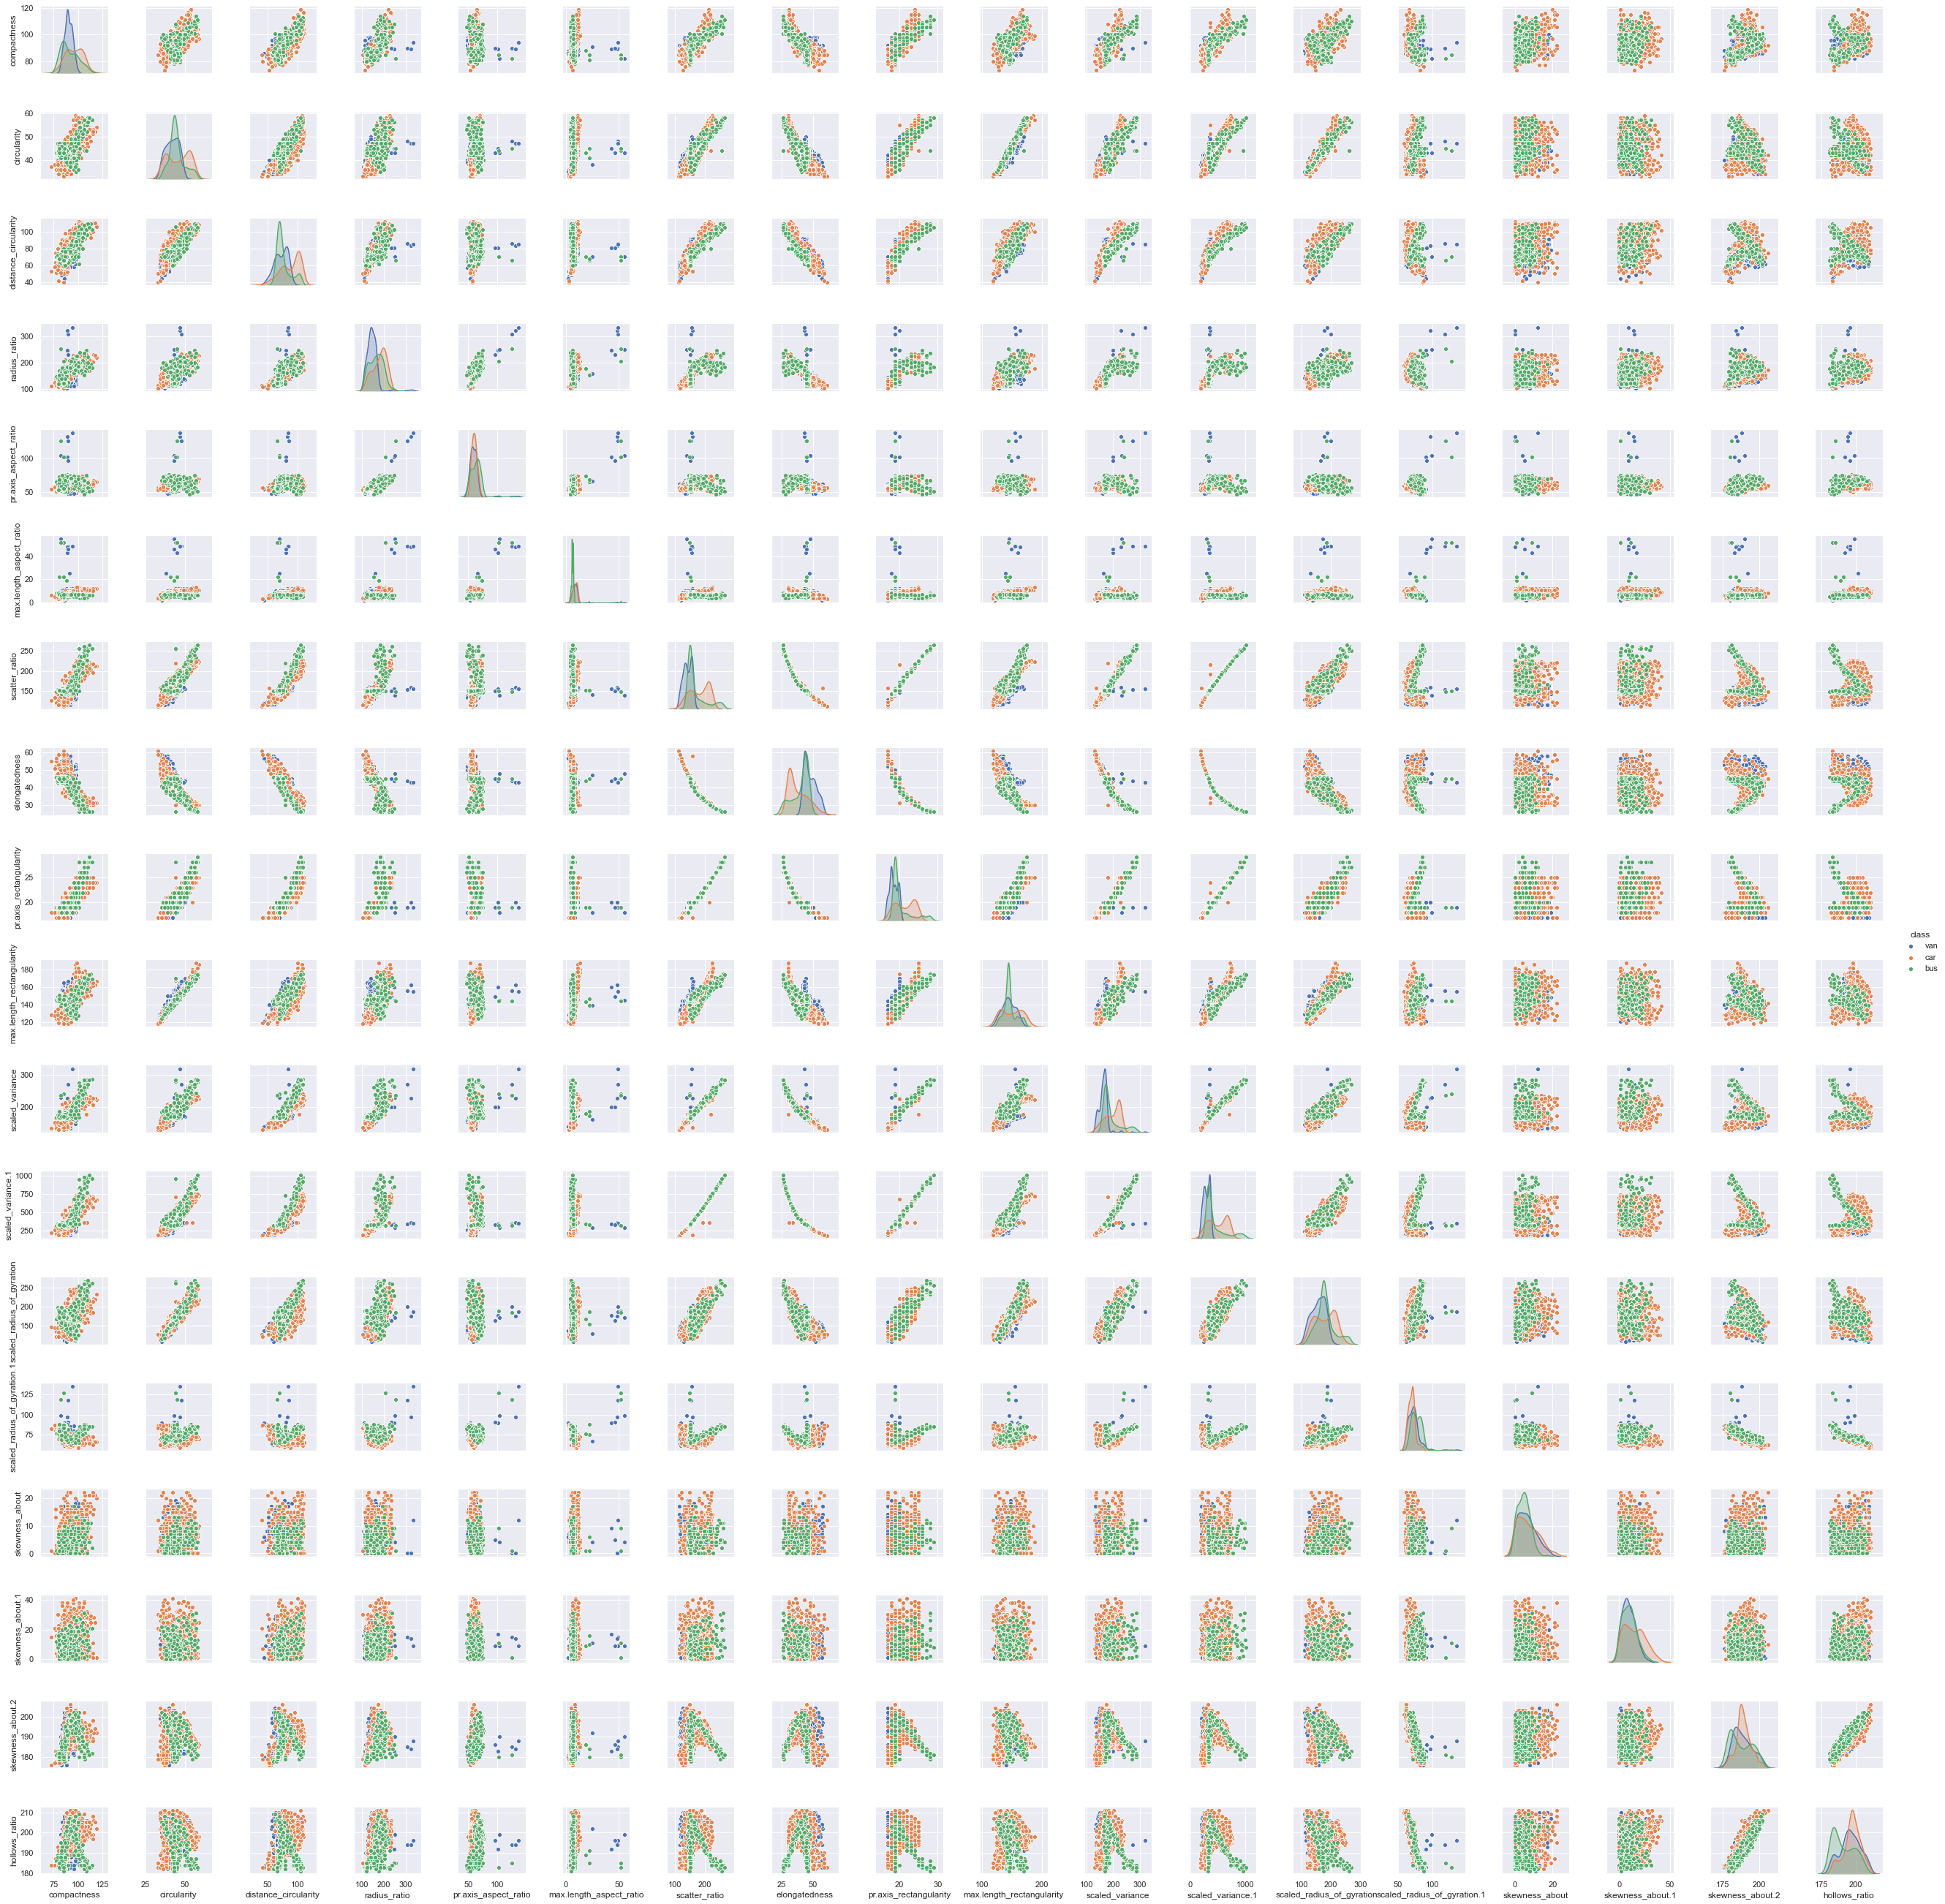

In [170]:
#scatterplot
sns.set()
sns.pairplot(df, size = 2.0,hue ='class')
plt.show()

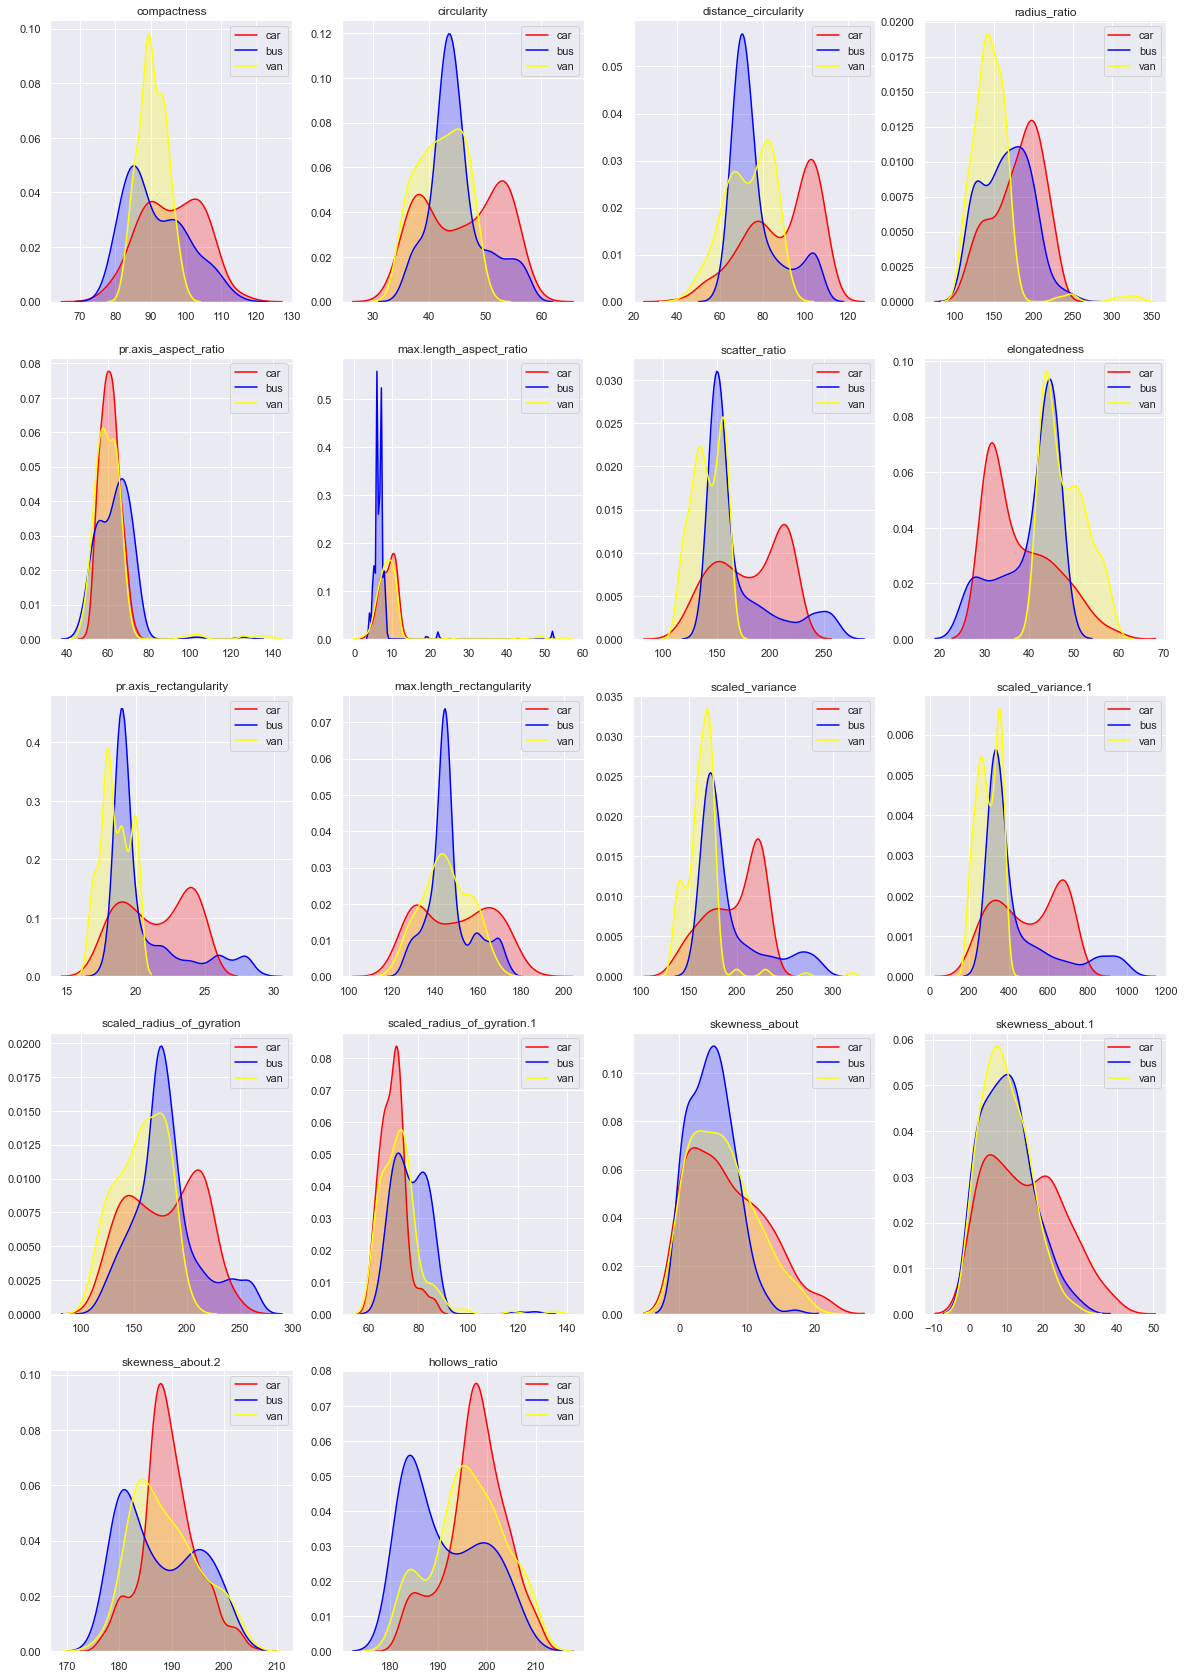

In [181]:
# PLotting distribution of the all the attributes with respect to dependent variable
k=1
plt.figure(figsize=(20,30))
for col in df.columns[0:18]:
    plt.subplot(5,4,k)
    sns.kdeplot(df[df['class']=='car'][col],color='red',label='car',shade=True)
    sns.kdeplot(df[df['class']=='bus'][col],color='blue',label='bus',shade=True)
    sns.kdeplot(df[df['class']=='van'][col],color='yellow',label='van',shade=True)
    plt.title(col)
    k=k+1

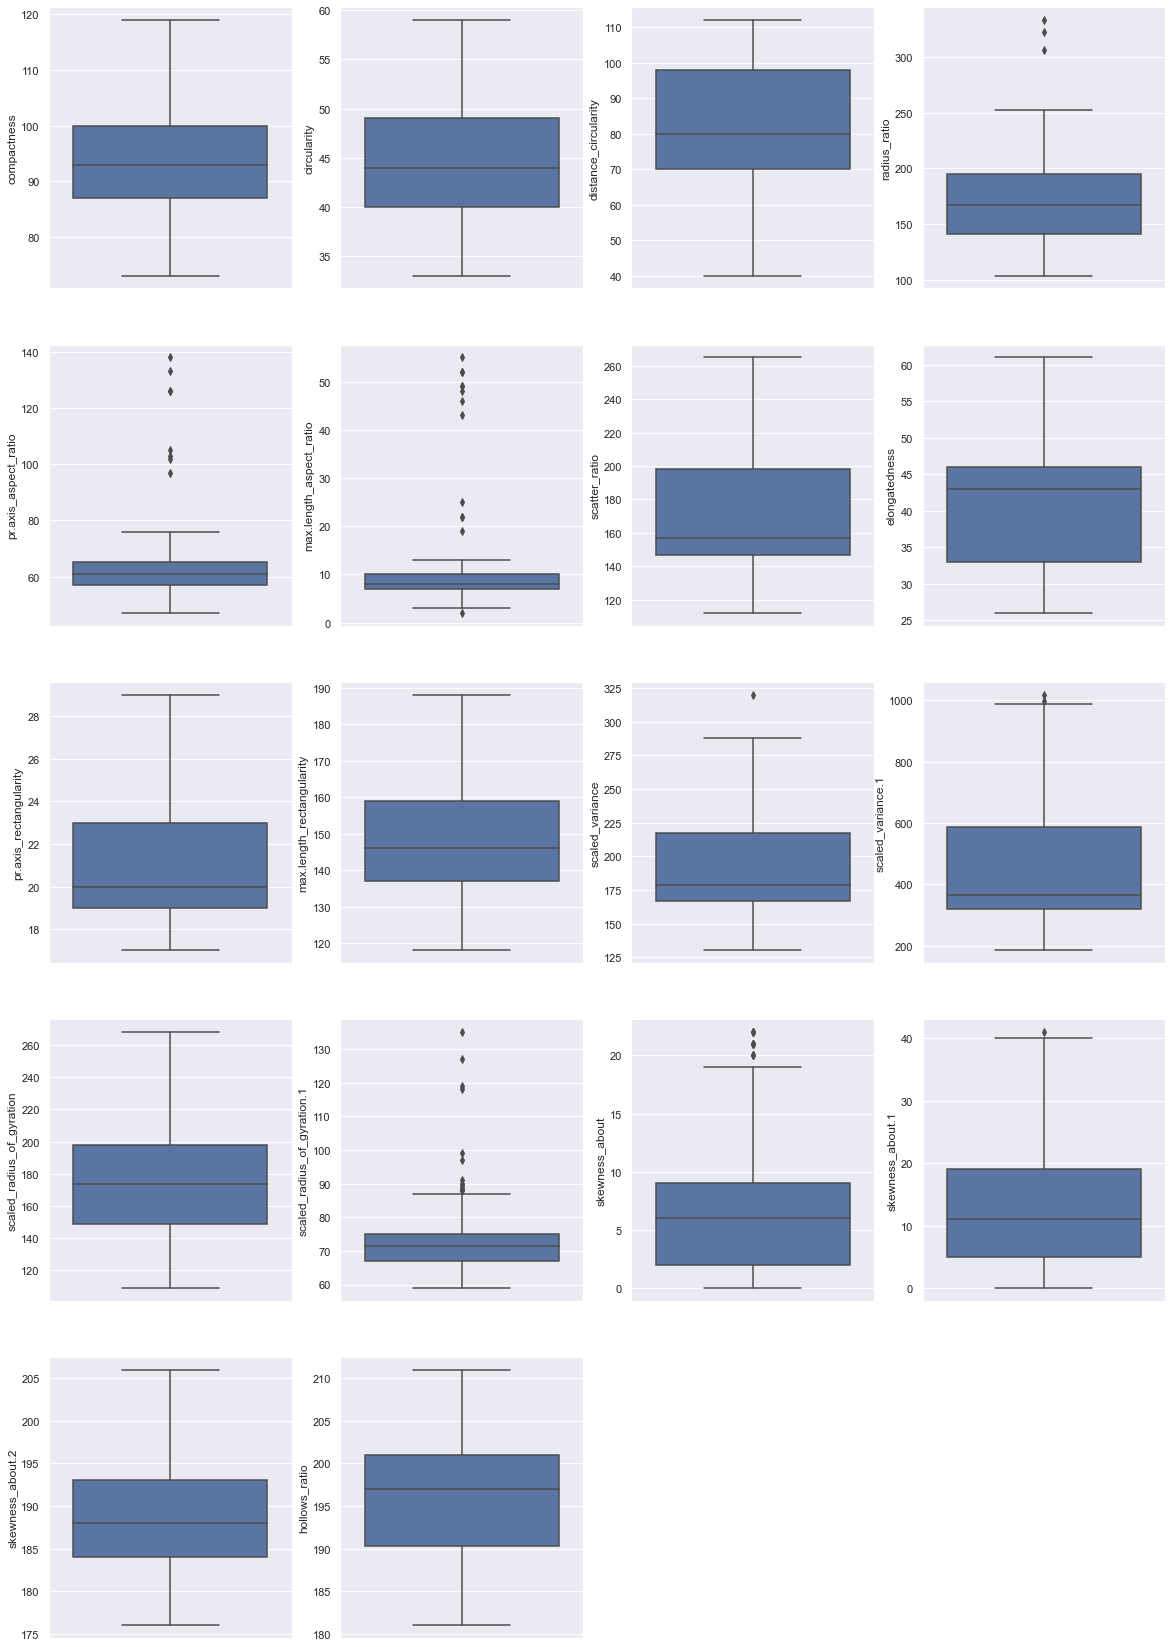

In [188]:
k=1
plt.figure(figsize=(20,30))

for col in df.columns[0:18]: # iterating columns except dependent column
    plt.subplot(5,4,k)
    #sns.boxplot(y=df[col])
    sns.boxplot(y=df[col],hue='class', data=df)
    k=k+1


1) The 'mean compectness', 'mean circularity' and the 'mean distance circularity' is highest for the cars.

2) The compectness is least for the van, and positively skewed data for bus indicates that few buses have higher compactness. 

3) Most of the other attirbutes distribution is similar for the car, van and bus

4) There are outliers in 'columns scaled_cariance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'radius_ratio' and 'max_length_aspect_ratio' columns  

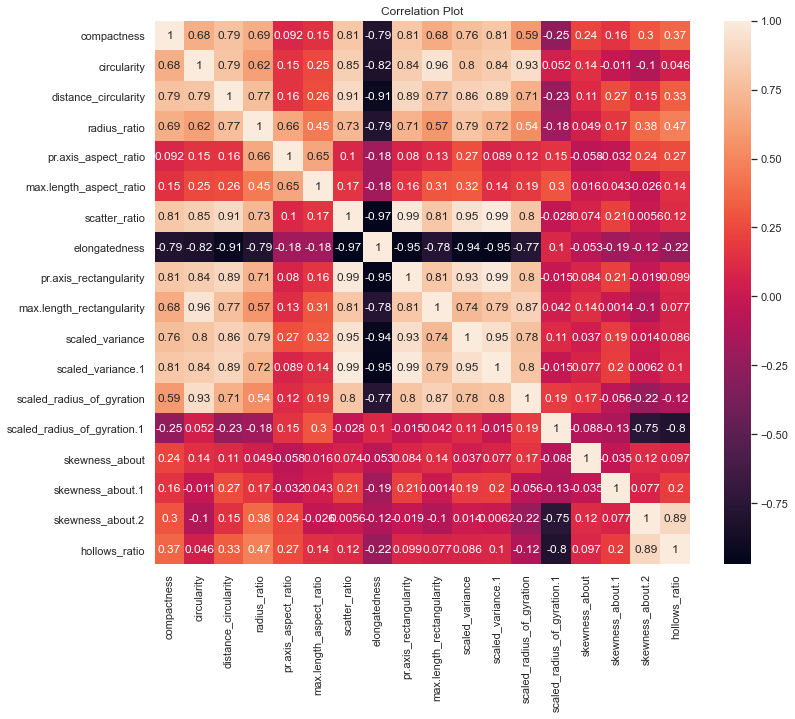

In [309]:
corr = df.corr()
# Plotting corelations using heatmap

plt.figure(figsize=(12,10))
plt.title("Correlation Plot")
sns.heatmap(corr, annot=True)
plt.show()

## Classifier - (task - 2 )

In [310]:
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 

In [311]:
x = df.drop(['class'], axis=1)
y = df['class']

In [312]:
XScaled=x.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [313]:
x_train,x_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(592, 18)
(592,)
(254, 18)
(254,)


In [314]:
svm_model = SVC()
svm_model.fit(x_train, y_train)


SVC()

In [315]:
predicted_labels = svm_model.predict(x_test)
svm_model.score(x_test, y_test)

0.952755905511811

In [316]:
y_pred = svm_model.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.89      0.98      0.94        59
         car       0.99      0.97      0.98       133
         van       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254



The model shows 95% accuracy using all the attributes given in the dataset 

### Dimensional reduction (task - 3 )

In [317]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

### Applying principlal component analysis for dimensional reduction

In [318]:
pca = PCA()
pca.fit(XScaled)

PCA()

#### Eigen values

In [319]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


#### Eigen Vectors

In [320]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

The percentage of variation explained by each eigen Vector

In [321]:
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


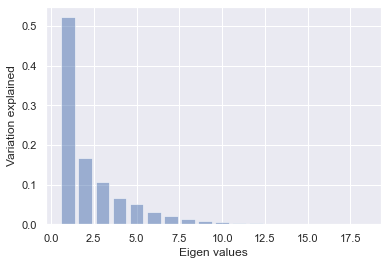

In [322]:
plt.bar(list(range(1,19)), pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen values')
plt.show()

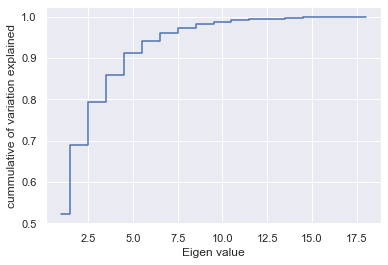

In [323]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('cummulative of variation explained')
plt.xlabel('Eigen value')
plt.show()

In the above plots, increasing principal compoenets drop in variance is observed. Using the above plot 8 principal components were selected as these 8 components explains 95% of variance in the data. 

In [324]:
pca8 = PCA(n_components = 8)
pca8.fit(XScaled)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
Xpca3 = pca8.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [325]:
Xpca3

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
        -7.57446693e-01, -9.01124283e-01, -3.81106357e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
        -5.17161832e-01,  3.78636988e-01,  2.47058909e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.05041037e-01, -3.45837595e-02,  4.82771767e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -2.17069763e-01,  5.73248962e-01,  1.10477865e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
        -4.02491279e-01, -2.02405787e-01,  3.20621635e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -3.35637136e-01,  5.80978683e-02, -2.48034955e-01]])

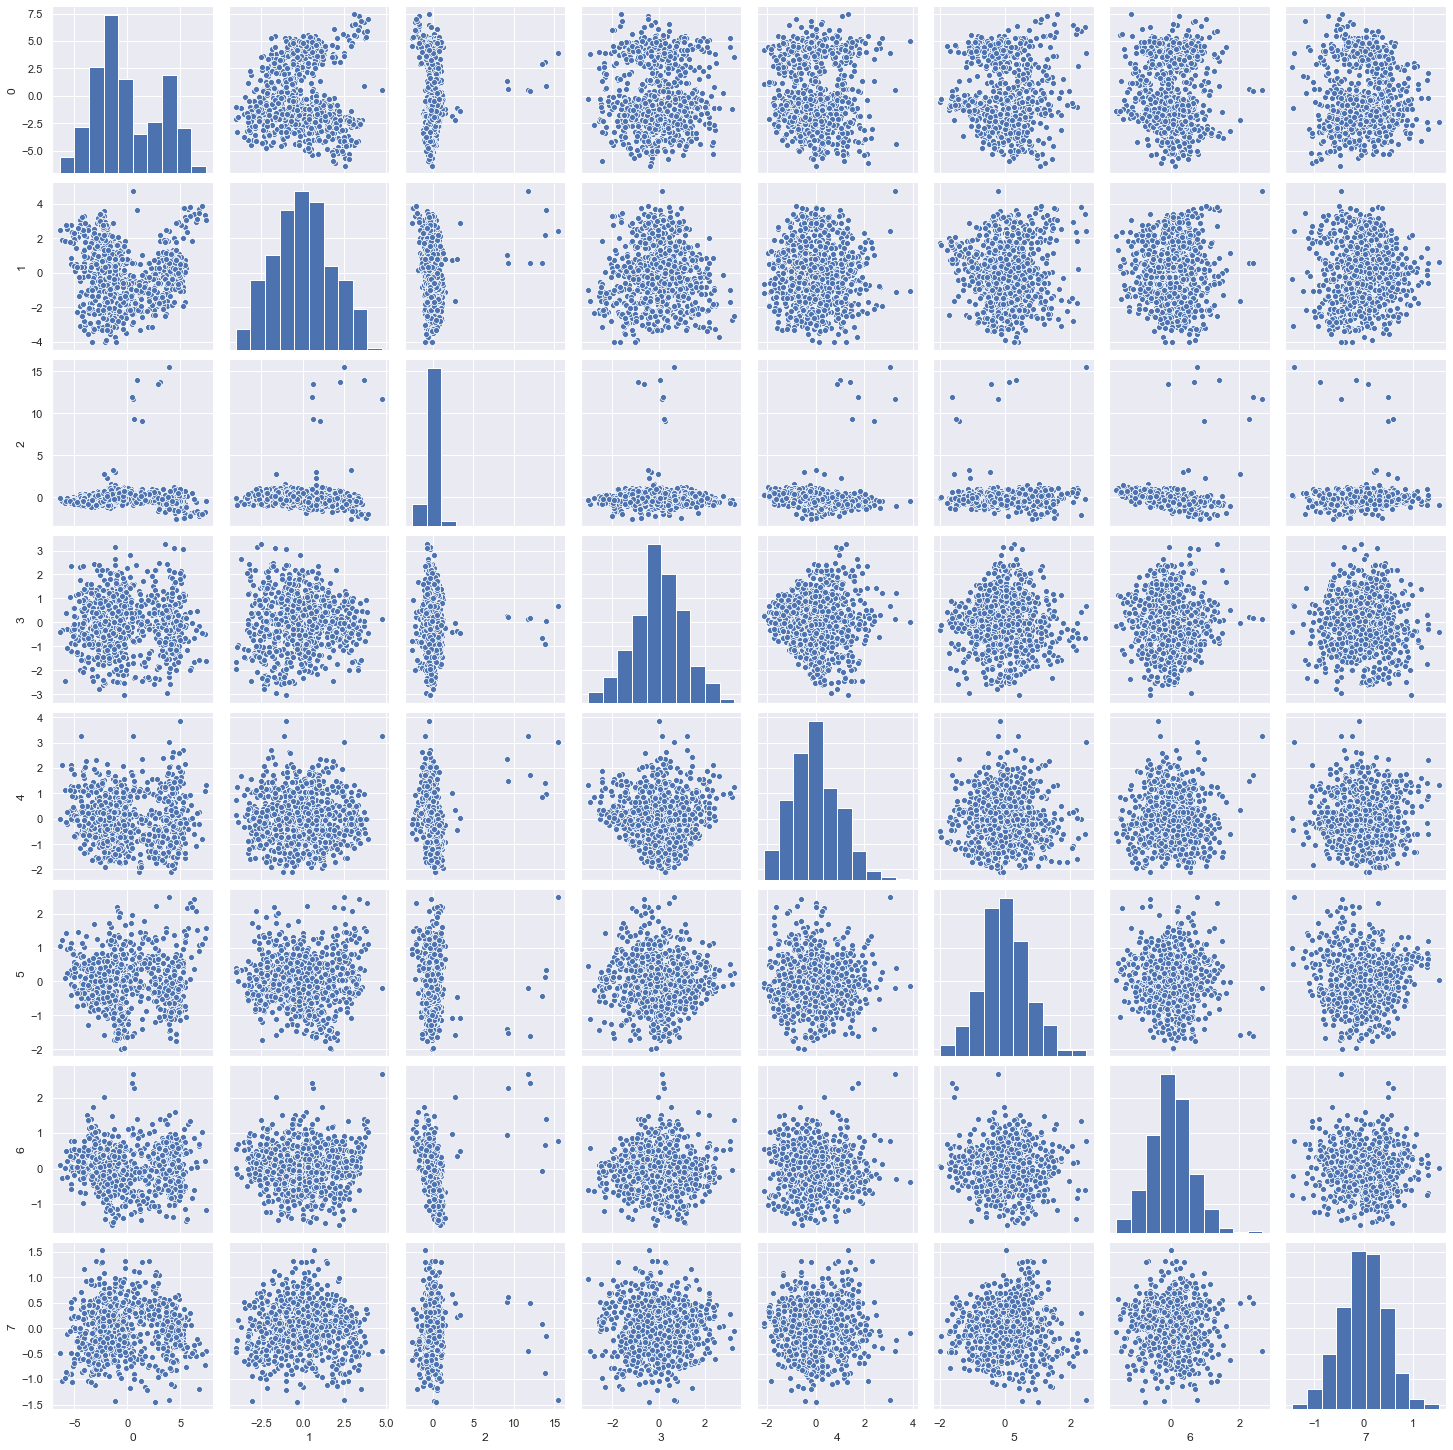

In [326]:
sns.pairplot(pd.DataFrame(Xpca3))

## SVM classifier (Task -5)

In [327]:
# split the transformed pca data
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(Xpca3, y, test_size = 0.3, random_state = 56)

In [328]:
svm_model.fit(pca_x_train, pca_y_train)
svm_model.score(pca_x_test, pca_y_test)

0.9409448818897638

In [329]:
y_pred = svm_model.predict(pca_x_test)
print(metrics.classification_report(pca_y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.99      0.92      0.95        72
         car       0.96      0.94      0.95       135
         van       0.84      0.98      0.90        47

    accuracy                           0.94       254
   macro avg       0.93      0.95      0.93       254
weighted avg       0.95      0.94      0.94       254



The model shows 94% accuray while using 8 principle components

To calculate classification results SVM model has been implemented. PCA has been implemented where we have extracted features by reducing dimensions from 18 to 8. Reducing the dimension of feature space, we have fewer relationships between variables to consider and are less likely to overfit model and as an added benefit, each of the “new” variables after PCA are all independent of one another as seen in pairplot. The accrucy of the results predicted by SVM classifier using all attribute (18) is 95%. However, the classification results predicted by the SVM classifier using PCA dimension reduction technique and using 8 attributes is around 94%. 

## Part-4

In [447]:
ipl = pd.read_csv('Part4_batting_bowling_ipl_bat.csv')
ipl.shape

(180, 7)

In [448]:
ipl.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In the given data set every alternative row contains null value.

In [449]:
df = ipl.iloc[1::2] # dropping rows with null entries
df.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.1+ KB


In [451]:
df_1 =df.drop(['Name'], axis=1)
df_1.head()

Runs    Ave      SR  Fours  Sixes   HF
1  733.0  61.08  160.74   46.0   59.0  9.0
3  590.0  36.87  143.55   64.0   17.0  6.0
5  495.0  33.00  161.23   57.0   19.0  5.0
7  479.0  43.54  149.68   41.0   20.0  5.0
9  569.0  40.64  129.61   58.0   18.0  5.0

In [452]:
df_1.isnull().sum()

Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

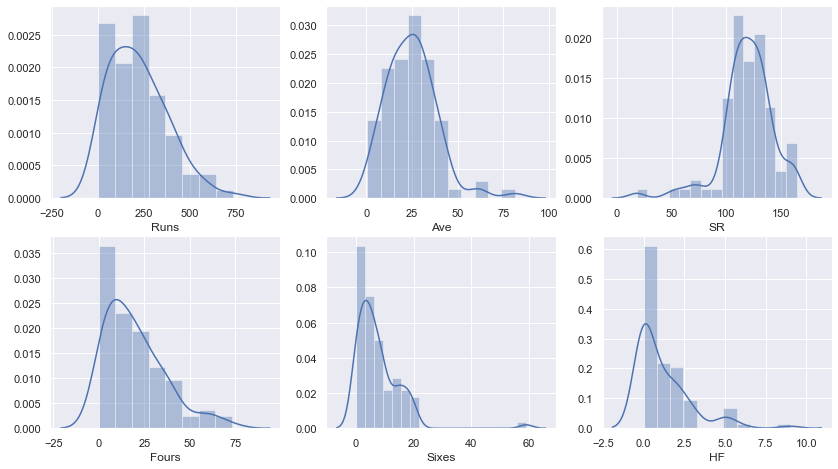

In [453]:
col= ['Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF'] # Not selecting categorica data columns 
i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(df[k])
    j=j+1
plt.show()

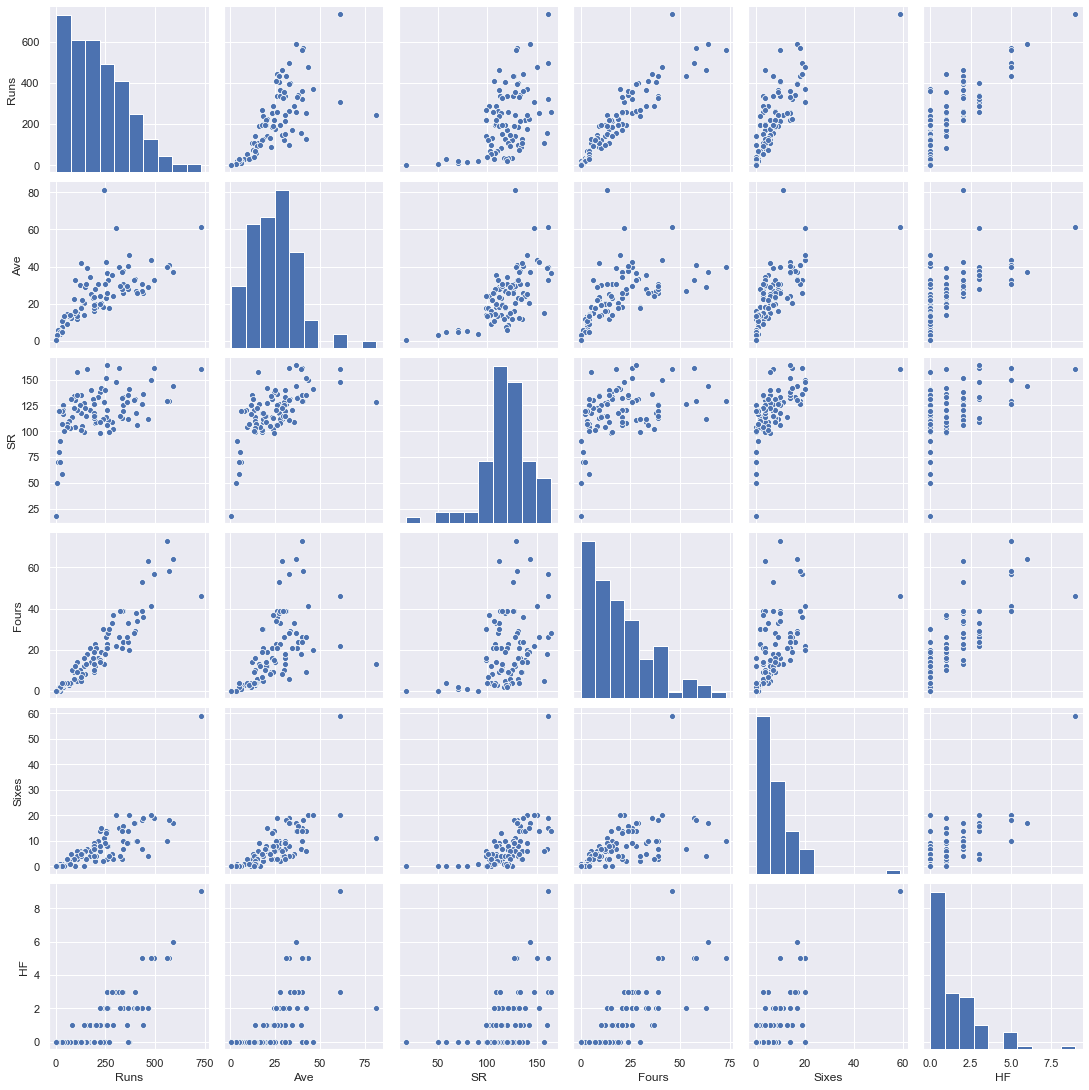

In [337]:
sns.pairplot(df)

In [454]:
#lets scale the data
XScaled=df_1.apply(zscore)
XScaled.head()

Runs       Ave        SR     Fours     Sixes        HF
1  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533

The data set contains 6 different attributes,  hence to rank the players the dimensiionality reduction technique can be used to select most relvant features to rank the player 

In [455]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [456]:
pca = PCA()
pca.fit(XScaled)

PCA()

### Eigen values

In [457]:
print(pca.explained_variance_)

[4.30252561 0.83636692 0.41665751 0.32912443 0.16567829 0.01706297]


### Eigen vectors

In [458]:
print(pca.components_)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]
 [ 0.45840889 -0.10122837 -0.11890348  0.09676885  0.39458014 -0.77486668]
 [ 0.70483594 -0.0606373   0.05624934 -0.58514214 -0.35786211  0.16096217]]


The percentage of variation explained by each eigen Vector

In [459]:
print(pca.explained_variance_ratio_)

[0.70911996 0.13784566 0.06867133 0.05424458 0.02730624 0.00281223]


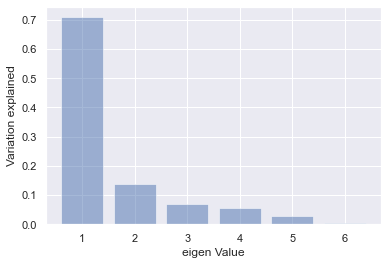

In [460]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

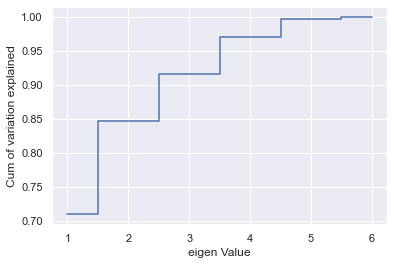

In [461]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

From the above plot it can be seen that the 90% of variance in the data can be explained by 'runs', 'average' and 'strike rate' attributes. Hence, using these attritibute for ranking the players. 

### Ranking the players based on runs scored 

In [473]:
df['Ranking'] = df['Runs'].rank(ascending = False)
df.sort_values("Ranking", inplace = True)
df.head()

<ipython-input-473-0f1bf4c2104f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ranking'] = df['Runs'].rank(ascending = False)
<ipython-input-473-0f1bf4c2104f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Ranking", inplace = True)


Name   Runs    Ave      SR  Fours  Sixes   HF  Ranking
1    CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0      1.0
3   G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0      2.0
9    S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0      3.0
11  AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0      4.0
5    V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0      5.0

### Ranking the players based on average  

In [474]:
df['Ranking'] = df['Ave'].rank(ascending = False)
df.sort_values("Ranking", inplace = True)
df.head()

<ipython-input-474-b004de99e331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ranking'] = df['Ave'].rank(ascending = False)
<ipython-input-474-b004de99e331>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Ranking", inplace = True)


Name   Runs    Ave      SR  Fours  Sixes   HF  Ranking
19     JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0      1.0
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0      2.0
13  KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0      3.0
29      DJ Bravo  371.0  46.37  140.53   20.0   20.0  0.0      4.0
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0      5.0

### Ranking the player based on Strike Rate

In [475]:
df['Ranking'] = df['SR'].rank(ascending = False)
df.sort_values("Ranking", inplace = True)
df.head()

<ipython-input-475-39e033a44e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ranking'] = df['SR'].rank(ascending = False)
<ipython-input-475-39e033a44e72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Ranking", inplace = True)


Name   Runs    Ave      SR  Fours  Sixes   HF  Ranking
21       DA Warner  256.0  36.57  164.10   28.0   14.0  3.0      1.0
5         V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0      2.0
17  AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0      3.0
1         CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0      4.0
41        DR Smith  157.0  39.25  160.20   18.0    7.0  1.0      5.0

## Part -5

The most commanly implemented Dimensionality Reduction Techniques in python are 
 Missing Value Ratio
1) Low Variance Filter

2) High Correlation Filter

3) Random Forest

4) Backward Feature Elimination

5) Forward Feature Selection

6) Factor Analysis

7) Principal Component Analysis

8) Independent Component Analysis

9) Methods Based on Projections

10) t-Distributed Stochastic Neighbor Embedding (t-SNE)

11) UMAP